In [1]:
# importing data
import pandas as pd
import numpy as np
np.random_state = 42
data = pd.read_csv('D:/MSBA/10 Applied Machine Learning/assignment/2/adult_income.csv')
print(data.head())

   age         workclass  fnlwgt  education  education-num  \
0   39         State-gov   77516  Bachelors             13   
1   50  Self-emp-not-inc   83311  Bachelors             13   
2   38           Private  215646    HS-grad              9   
3   53           Private  234721       11th              7   
4   28           Private  338409  Bachelors             13   

       marital-status         occupation   relationship   race     sex  \
0       Never-married       Adm-clerical  Not-in-family  White    Male   
1  Married-civ-spouse    Exec-managerial        Husband  White    Male   
2            Divorced  Handlers-cleaners  Not-in-family  White    Male   
3  Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
4  Married-civ-spouse     Prof-specialty           Wife  Black  Female   

   capital-gain  capital-loss  hours-per-week native-country Income level  
0          2174             0              40  United-States        <=50K  
1             0             0 

In [17]:
# changing a few variables
data['country'] = ['US' if x == 'United-States' else 'Non US' for x in data['native-country']]
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Income level,country
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,US
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,US
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,US
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,US
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,Non US


In [19]:
# droping unrequired variables
data_new = data.drop(['education','native-country'], axis = 1)
data_new.head()

,age,workclass,fnlwgt,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,Income level,country
0,39,State-gov,77516,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,<=50K,US
1,50,Self-emp-not-inc,83311,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,<=50K,US
2,38,Private,215646,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,<=50K,US
3,53,Private,234721,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,<=50K,US
4,28,Private,338409,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,<=50K,Non US


In [21]:
# one-hot coding categorical data
data_new = pd.get_dummies(data_new, drop_first = True)
data_new.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,...,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Male,Income level_ >50K,country_US
0,39,77516,13,2174,0,40,0,0,0,0,...,0,0,0,0,0,0,1,1,0,1
1,50,83311,13,0,0,13,0,0,0,0,...,0,0,0,0,0,0,1,1,0,1
2,38,215646,9,0,0,40,0,0,0,1,...,0,0,0,0,0,0,1,1,0,1
3,53,234721,7,0,0,40,0,0,0,1,...,0,0,0,0,1,0,0,1,0,1
4,28,338409,13,0,0,40,0,0,0,1,...,0,0,1,0,1,0,0,0,0,0


In [24]:
# creating X and y varible from data
X = data_new.drop('Income level_ >50K', axis = 1)
y = data.iloc[:,-2]
print(X.shape)

(32561, 45)


In [29]:
# scaling features
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X)
print(X[:1])

[[ 0.03067056 -1.06361075  1.13473876  0.1484529  -0.21665953 -0.03542945
  -0.17429511 -0.26209736 -0.01466381 -1.5167923  -0.18838933 -0.29093568
   4.90769968 -0.02073999 -0.02658695 -0.92284068 -0.11403678  1.43105786
  -0.1802846  -0.17735813  2.76348874 -0.01662771 -0.37949517 -0.37774555
  -0.17745022 -0.20957797 -0.25595432 -0.33554133 -0.06780164 -0.38166338
  -0.14260848 -0.35531609 -0.17127887 -0.22710355  1.70899099 -0.17624972
  -0.42934582 -0.34403232 -0.22492681 -0.18155194 -0.32576824 -0.09161163
   0.4130197   0.70307135  0.34095391]]


In [44]:
# adding columns to transformed X
X = pd.DataFrame(X)
X.columns = data_new.drop('Income level_ >50K', axis = 1).columns
X.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,...,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Male,country_US
0,0.030671,-1.063611,1.134739,0.148453,-0.21666,-0.035429,-0.174295,-0.262097,-0.014664,-1.516792,...,-0.17625,-0.429346,-0.344032,-0.224927,-0.181552,-0.325768,-0.091612,0.413020,0.703071,0.340954
1,0.837109,-1.008707,1.134739,-0.145920,-0.21666,-2.222153,-0.174295,-0.262097,-0.014664,-1.516792,...,-0.17625,-0.429346,-0.344032,-0.224927,-0.181552,-0.325768,-0.091612,0.413020,0.703071,0.340954
2,-0.042642,0.245079,-0.420060,-0.145920,-0.21666,-0.035429,-0.174295,-0.262097,-0.014664,0.659286,...,-0.17625,-0.429346,-0.344032,-0.224927,-0.181552,-0.325768,-0.091612,0.413020,0.703071,0.340954
3,1.057047,0.425801,-1.197459,-0.145920,-0.21666,-0.035429,-0.174295,-0.262097,-0.014664,0.659286,...,-0.17625,-0.429346,-0.344032,-0.224927,-0.181552,3.069667,-0.091612,-2.421192,0.703071,0.340954
4,-0.775768,1.408176,1.134739,-0.145920,-0.21666,-0.035429,-0.174295,-0.262097,-0.014664,0.659286,...,-0.17625,-0.429346,-0.344032,4.445891,-0.181552,3.069667,-0.091612,-2.421192,-1.422331,-2.932948


# Task 1: running clustering algorithm in above dataset

In [51]:
# clustering dataset using k-means
import numpy as np
from sklearn.cluster import KMeans

np.random.seed(42)

clust = KMeans()

rmse = []

for k in range(2,10):
    clust.set_params(n_clusters = k)
    clust.fit(X)
    rmse.append(np.sqrt(clust.inertia_))

print(rmse)

[1174.7633068048783, 1151.9911017397262, 1138.520102000146, 1119.0140230707918, 1105.464971177678, 1091.8193650938597, 1079.874150628683, 1064.6341866899484]


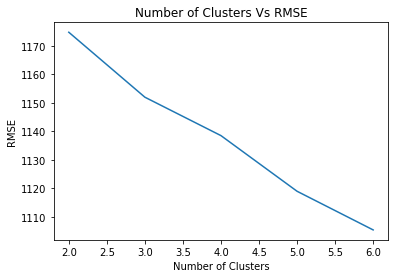

In [39]:
# plotting elbow curve between number of clusters and rmse
import matplotlib.pyplot as plt
def plot_line(x,y,title,ylabel,xlabel):
    plt.plot(x,y)
    plt.title(title)
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    plt.show()
    
plot_line(range(2,7),rmse[:5],'Number of Clusters Vs RMSE','RMSE','Number of Clusters')

# Feature Selection Algorithm: Decision Tree

In [40]:
# feature selection through decision tree
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier()
dt_clf.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [45]:
import pandas as pd
feature_imp = pd.DataFrame({'name':X.columns, 'score':dt_clf.feature_importances_})
print(feature_imp.sort_values('score', ascending = False))

                                    name     score
15     marital-status_Married-civ-spouse  0.197771
1                                 fnlwgt  0.194104
2                          education-num  0.123963
0                                    age  0.112165
3                           capital-gain  0.105644
5                         hours-per-week  0.068469
4                           capital-loss  0.038315
9                      workclass_Private  0.010456
23            occupation_Exec-managerial  0.010025
31                      occupation_Sales  0.009237
11            workclass_Self-emp-not-inc  0.008820
44                            country_US  0.008021
22               occupation_Craft-repair  0.007543
29             occupation_Prof-specialty  0.007456
42                            race_White  0.007203
38                     relationship_Wife  0.006770
26          occupation_Machine-op-inspct  0.006657
43                              sex_Male  0.006514
33           occupation_Transpo

In [46]:
# selecting top features based on above table
X_sub = X[['marital-status_Married-civ-spouse','fnlwgt','education-num','age','capital-gain']]
X_sub.shape

(32561, 5)

In [48]:
# making cluster with just above features
def clustering(X):
    dr_clust = KMeans()
    rmse = []
    for k in range(2,10):
        dr_clust.set_params(n_clusters = k)
        dr_clust.fit(X)
        rmse.append(np.sqrt(dr_clust.inertia_))
    return rmse

dr_rmse = clustering(X_sub)
print(dr_rmse)

[355.5482978740418, 312.88785351617923, 291.34416700453744, 270.5223486046769, 252.63850401153465, 239.43284438308143, 227.5513155881999, 218.4207785530117]


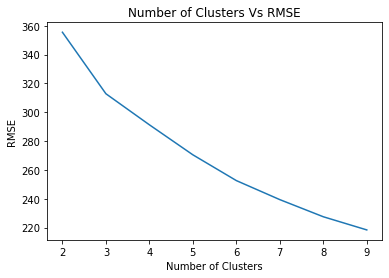

In [49]:
plot_line(range(2,10), dr_rmse,'Number of Clusters Vs RMSE','RMSE','Number of Clusters')

In [52]:
kmeans_comparision = pd.DataFrame({'Clusters':range(2,10),'Normal':rmse,'DR_dt':dr_rmse})
print(kmeans_comparision)

   Clusters       Normal       DR_dt
0         2  1174.763307  355.548298
1         3  1151.991102  312.887854
2         4  1138.520102  291.344167
3         5  1119.014023  270.522349
4         6  1105.464971  252.638504
5         7  1091.819365  239.432844
6         8  1079.874151  227.551316
7         9  1064.634187  218.420779


In [53]:
# function for adding column to a dataframe
def add_column(df,col_name, col):
    df[col_name] = col

# Dimensionality Reduction - PCA

In [54]:
# using PCA for dimensionality reduction
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [58]:
print([round(x,4) for x in pca.explained_variance_ratio_])

[0.0721, 0.0485, 0.0451, 0.0391, 0.0351, 0.0338, 0.0314, 0.0295, 0.0275, 0.0264, 0.0259, 0.0251, 0.025, 0.0243, 0.0242, 0.0236, 0.0235, 0.0233, 0.0232, 0.0227, 0.0225, 0.0224, 0.0222, 0.0221, 0.0219, 0.0217, 0.0215, 0.0214, 0.0209, 0.0201, 0.0199, 0.0195, 0.0179, 0.0166, 0.0153, 0.0147, 0.0132, 0.0106, 0.0095, 0.0077, 0.0044, 0.0037, 0.0008, 0.0002, 0.0]


In [59]:
# as can be seen from above ratio top 2 companents explain 90% variance in data
pca = PCA(n_components = 28)
X_pca_transformed = pca.fit_transform(X)
pca.explained_variance_ratio_

array([0.07207545, 0.04854499, 0.04506269, 0.03906946, 0.03508682,
       0.03384705, 0.03138388, 0.02948978, 0.02748082, 0.02639797,
       0.0258502 , 0.02503648, 0.02500526, 0.02431024, 0.02416223,
       0.02358823, 0.02350886, 0.0232493 , 0.02321802, 0.02267428,
       0.02242207, 0.02234965, 0.02214652, 0.02208579, 0.02192476,
       0.02170496, 0.02142542, 0.02139245])

In [60]:
# using transformed X_pca for clustering
pca_rmse = clustering(X_pca_transformed)
print(pca_rmse)

[1046.0261138489234, 1020.4789790255315, 1007.4595549431654, 988.1396081136689, 970.4568930018548, 959.8408015689157, 944.1900585202944, 922.1070530766322]


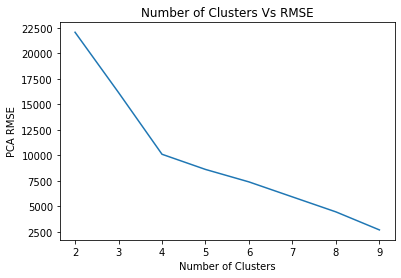

In [95]:
plot_line(range(2,10), pca_rmse,'Number of Clusters Vs RMSE','PCA RMSE','Number of Clusters')

In [61]:
# adding pca_rmse in DF with other RMSEs
add_column(kmeans_comparision,'pca_rmse', pca_rmse)
print(kmeans_comparision)

   Clusters       Normal       DR_dt     pca_rmse
0         2  1174.763307  355.548298  1046.026114
1         3  1151.991102  312.887854  1020.478979
2         4  1138.520102  291.344167  1007.459555
3         5  1119.014023  270.522349   988.139608
4         6  1105.464971  252.638504   970.456893
5         7  1091.819365  239.432844   959.840802
6         8  1079.874151  227.551316   944.190059
7         9  1064.634187  218.420779   922.107053


# Dimensionality Reduction : ICA

In [62]:
# using ICA to find out important dimmensions from the dataset
from sklearn.decomposition import FastICA

ica = FastICA()
kmeans = KMeans()

ica_n_comp = []
ica_n_clust = []
ica_rmse = []

for n in range(2,14):
    ica.set_params(n_components = n)
    X_ica = ica.fit_transform(X)
    for k in range(2,10):
        kmeans.set_params(n_clusters = k)
        kmeans.fit(X_ica)
        ica_n_comp.append(n)
        ica_n_clust.append(k)
        ica_rmse.append(kmeans.inertia_)

In [63]:
ica_matrix = pd.DataFrame({'n_components':ica_n_comp, 'n_clusters':ica_n_clust, 'RMSE':ica_rmse})
print(ica_matrix.sort_values('RMSE'))

    n_components  n_clusters       RMSE
7              2           9   0.249224
6              2           8   0.275792
5              2           7   0.313101
4              2           6   0.359930
3              2           5   0.433855
..           ...         ...        ...
81            12           3  10.284771
90            13           4  10.623853
80            12           2  11.189851
89            13           3  11.335329
88            13           2  12.138634

[96 rows x 3 columns]


In [64]:
print(ica_matrix[ica_matrix['n_components']==2])

   n_components  n_clusters      RMSE
0             2           2  1.249382
1             2           3  0.681819
2             2           4  0.553371
3             2           5  0.433855
4             2           6  0.359930
5             2           7  0.313101
6             2           8  0.275792
7             2           9  0.249224


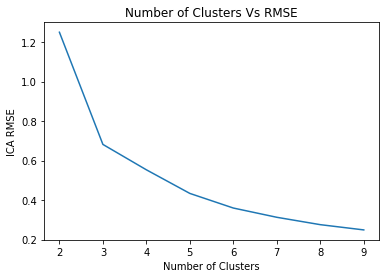

In [65]:
plot_line(range(2,10), ica_matrix[ica_matrix['n_components']==2]['RMSE'],'Number of Clusters Vs RMSE','ICA RMSE','Number of Clusters')

In [66]:
# adding ica rmse in DF with other RMSEs
add_column(kmeans_comparision,'ica_rmse', ica_matrix[ica_matrix['n_components']==2]['RMSE'])
print(kmeans_comparision)

   Clusters       Normal       DR_dt     pca_rmse  ica_rmse
0         2  1174.763307  355.548298  1046.026114  1.249382
1         3  1151.991102  312.887854  1020.478979  0.681819
2         4  1138.520102  291.344167  1007.459555  0.553371
3         5  1119.014023  270.522349   988.139608  0.433855
4         6  1105.464971  252.638504   970.456893  0.359930
5         7  1091.819365  239.432844   959.840802  0.313101
6         8  1079.874151  227.551316   944.190059  0.275792
7         9  1064.634187  218.420779   922.107053  0.249224


# Dimenssionality Reduction: Randomized Projection

In [67]:
# using gaussian random projection to reduce dimmension of dataset and testing with k-means to find optinal n_components
from sklearn.random_projection import GaussianRandomProjection

transformer = GaussianRandomProjection()
kmeans = KMeans()

n_comp = []
n_clust = []
grp_rmse = []

for n in range(2,14):
    transformer.set_params(n_components = n)
    X_grp = transformer.fit_transform(X)
    for k in range(2,10):
        kmeans.set_params(n_clusters = k)
        kmeans.fit(X_grp)
        n_comp.append(n)
        n_clust.append(k)
        grp_rmse.append(kmeans.inertia_)

In [68]:
grp_matrix = pd.DataFrame({'n_components':n_comp, 'n_clusters':n_clust, 'RMSE':grp_rmse})

In [70]:
print(grp_matrix.sort_values('RMSE'))

    n_components  n_clusters          RMSE
7              2           9  2.379504e+05
6              2           8  2.720400e+05
5              2           7  3.060825e+05
4              2           6  3.440967e+05
3              2           5  3.868899e+05
..           ...         ...           ...
89            13           3  1.318428e+06
40             7           2  1.319705e+06
56             9           2  1.384631e+06
88            13           2  1.428037e+06
48             8           2  1.433023e+06

[96 rows x 3 columns]


In [71]:
# from above matrix it can be seen rmse is minimum for n_components = 2
print(grp_matrix[grp_matrix['n_components'] == 2])

   n_components  n_clusters           RMSE
0             2           2  700651.503778
1             2           3  541806.493571
2             2           4  447718.404144
3             2           5  386889.900157
4             2           6  344096.696262
5             2           7  306082.527077
6             2           8  272040.040080
7             2           9  237950.389466


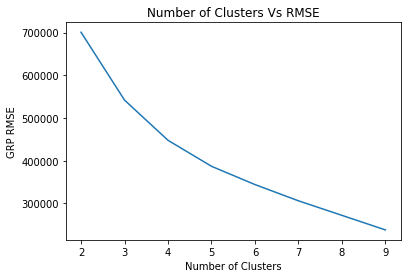

In [72]:
plot_line(range(2,10), grp_matrix[grp_matrix['n_components'] == 2]['RMSE'],'Number of Clusters Vs RMSE','GRP RMSE','Number of Clusters')

In [73]:
# adding GRP rmse in DF with other RMSEs
add_column(kmeans_comparision,'grp_rmse', grp_matrix[grp_matrix['n_components'] == 2]['RMSE'])
print(kmeans_comparision)

   Clusters       Normal       DR_dt     pca_rmse  ica_rmse       grp_rmse
0         2  1174.763307  355.548298  1046.026114  1.249382  700651.503778
1         3  1151.991102  312.887854  1020.478979  0.681819  541806.493571
2         4  1138.520102  291.344167  1007.459555  0.553371  447718.404144
3         5  1119.014023  270.522349   988.139608  0.433855  386889.900157
4         6  1105.464971  252.638504   970.456893  0.359930  344096.696262
5         7  1091.819365  239.432844   959.840802  0.313101  306082.527077
6         8  1079.874151  227.551316   944.190059  0.275792  272040.040080
7         9  1064.634187  218.420779   922.107053  0.249224  237950.389466


# Task 4: Training Neural Network

In [74]:
# creating a neural network running function
from sklearn.neural_network import MLPClassifier

def run_nn(X_train, X_test, y_train,y_test):
    nn_clf = MLPClassifier()
    nn_clf.fit(X_train,y_train)
    training_accuracy = nn_clf.score(X_train,y_train)
    test_accuracy = nn_clf.score(X_test,y_test)
    return(training_accuracy,test_accuracy)
    

In [75]:
# training and testing accuracy for normal data (w/o any dimensionality reduction)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train,y_test = train_test_split(X,y,test_size = 0.3)

print(X.shape, X_train.shape, X_test.shape)

(32561, 45) (22792, 45) (9769, 45)


In [76]:
print(run_nn(X_train, X_test, y_train,y_test))

(0.892023517023517, 0.8456341488381616)


C:\Users\asus\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [78]:
# training and testing data set for feature selected through decision tree 
X_train_dt = X_train[['marital-status_Married-civ-spouse','fnlwgt','education-num','age','capital-gain']]
X_test_dt = X_test[['marital-status_Married-civ-spouse','fnlwgt','education-num','age','capital-gain']]
print(X_train_dt.shape, X_test_dt.shape)

(22792, 5) (9769, 5)


In [79]:
# training and testing data for feature selected through PCA
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
print(X_train_pca.shape, X_test_pca.shape)

(22792, 28) (9769, 28)


In [80]:
# training and testing data for feature transformed through ICA
ica.set_params(n_components = 2)
X_train_ica = ica.fit_transform(X_train)
X_test_ica = ica.transform(X_test)

In [81]:
# traing and testing data for feature transformed through GRP
transformer.set_params(n_components = 2)
X_train_grp = transformer.fit_transform(X_train)
X_testr_grp = transformer.transform(X_test)

In [82]:
# running above different training and testing dataset through NN
X_train_lst = [X_train,X_train_dt, X_train_pca, X_train_ica, X_train_grp]
X_test_lst = [X_test, X_test_dt, X_test_pca, X_test_ica, X_testr_grp]

train_accu = []
test_accu = []

for i in range(5):
    nn_accu = run_nn(X_train_lst[i],X_test_lst[i],y_train,y_test)
    train_accu.append(nn_accu[0])
    test_accu.append(nn_accu[1])

C:\Users\asus\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\asus\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [83]:
# result comparision for transformed data
methodology = ['No Transformation','Fearure Selection: Decision Tree', 'PCA','ICA','RP - Gaussian Randmized Projections']

nn_results_comparision = pd.DataFrame({'Method': methodology,'Train Accuracy':train_accu, 'Test Accuracy':test_accu})
print(nn_results_comparision)

                                Method  Train Accuracy  Test Accuracy
0                    No Transformation        0.892287       0.845122
1     Fearure Selection: Decision Tree        0.845823       0.845327
2                                  PCA        0.876887       0.852288
3                                  ICA        0.787206       0.788310
4  RP - Gaussian Randmized Projections        0.760574       0.765073


# Task 5: applying neural network on clustering outcome

In [91]:
clust.set_params(n_clusters = 3)
y_predict = clust.fit_predict(X)
print(y_predict[:5])

[0 1 0 2 2]


In [92]:
#running NN on clustering output

X_train, X_test, y_train,y_test = train_test_split(y_predict,y,test_size = 0.3)

print(run_nn(X_train.reshape(-1,1),X_test.reshape(-1,1),y_train,y_test))

(0.7598718848718848, 0.7576005732418876)
